# Read lengths exploration

In [89]:
from datamap import experiment_files, experiments_dict
from Fast5Fetch.fast5fetch.fast5data import get_all_fast5s
from ont_fast5_api.fast5_interface import get_fast5_file
from matplotlib import pyplot as plt

skip = 25
exp_lengths = {}
for k in experiment_files.keys():
    file_lengths = {}
    for f in sorted(experiment_files[k], key=lambda x: int(x.stem.split('_')[-1]))[::skip]:
        print(f.stem)
        lengths = []
        with get_fast5_file(f, mode='r') as f5:
            for i,read in enumerate(f5.get_reads()):
                x = read.get_raw_data(scale=True)
                lengths.append(len(x))
        file_lengths[f.stem]=lengths
    exp_lengths[k]= file_lengths
    print(f'EXP {k} done')


FAR89595_30596c4a_0
FAR89595_30596c4a_25
FAR89595_30596c4a_50
FAR89595_30596c4a_75
FAR89595_30596c4a_100
FAR89595_30596c4a_125
FAR89595_30596c4a_150
FAR89595_30596c4a_175
FAR89595_30596c4a_200
FAR89595_30596c4a_225
FAR89595_30596c4a_250
EXP pos_2022 done
FAR56295_37f312c1_0
FAR56295_37f312c1_25
FAR56295_37f312c1_50
FAR56295_37f312c1_75
FAR56295_37f312c1_100
FAR56295_37f312c1_125
FAR56295_37f312c1_150
FAR56295_37f312c1_175
FAR56295_37f312c1_200
FAR56295_37f312c1_225
FAR56295_37f312c1_250
FAR56295_37f312c1_275
FAR56295_37f312c1_300
FAR56295_37f312c1_325
FAR56295_37f312c1_350
FAR56295_37f312c1_375
FAR56295_37f312c1_400
FAR56295_37f312c1_425
FAR56295_37f312c1_450
FAR56295_37f312c1_475
FAR56295_37f312c1_500
EXP neg_2022 done
FAO56186_d9cbe3d3_0
FAO56186_d9cbe3d3_25
FAO56186_d9cbe3d3_50
FAO56186_d9cbe3d3_75
FAO56186_d9cbe3d3_100
FAO56186_d9cbe3d3_125
EXP pos_2020 done
FAO56097_20250069_0
FAO56097_20250069_25
FAO56097_20250069_50
FAO56097_20250069_75
FAO56097_20250069_100
FAO56097_20250069_12

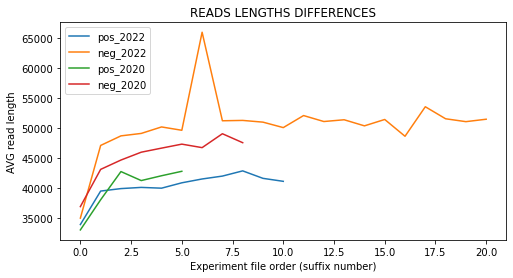

In [90]:
from statistics import mean
# fig, axs = plt.subplots(len(exp_lengths.keys()), sharey=True, figsize=(13,10))
fig, ax = plt.subplots(figsize=(8,4))
for j, (exp, file_lengths) in enumerate(exp_lengths.items()):
    # fig, axs = plt.subplots(len(file_lengths.keys()), sharey=True, figsize=(13,10))
    means = []
    for i,(k,v) in enumerate(file_lengths.items()):
        means.append(int(mean(v)))
        # axs[i].plot(v, label=f'{exp}:MEAN:{int(mean(v))}', color='black')
        # axs[i].legend(loc="upper left")
    ax.plot(means, label=exp)
    
ax.set_title('READS LENGTHS DIFFERENCES')
ax.set_ylabel('AVG read length')
ax.set_xlabel('Experiment file order (suffix number)')
# ax.set_xticks(range(0,10*skip,skip))
ax.legend(loc="upper left")
pass
#On avg, shorter reads have Modifs, longer do not

# Data standartization/shuffling exploration

In [94]:
from torch.utils.data import DataLoader
from dataloading import get_my_dataset
from datamap import experiment_files

#TODO check if we load from different files randomly
#TODO validate on random files, not last 3
#TODO check standartization across channels/files is similar
#TODO 2022 vs 2020 data
#TODO window size
experiment_files

# train_dset, valid_dset = get_my_dataset()

# train_loader = DataLoader(train_dset, batch_size=32, num_workers=32,
                          # pin_memory=True, persistent_workers=True)


{'pos_2022': [PosixPath('../../meta/martinekv/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_14.fast5'),
  PosixPath('../../meta/martinekv/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_193.fast5'),
  PosixPath('../../meta/martinekv/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_116.fast5'),
  PosixPath('../../meta/martinekv/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_254.fast5'),
  PosixPath('../../meta/martinekv/store/seq/ont/experiments/20220303_hsa_dRNA_HeLa_5EU_polyA_REL5_2/runs/20220303_1920_MN36569_FAR89595_b610d332/fast5/FAR89595_30596c4a_41.fast5'),
  PosixPath('../../meta/martinekv/store/seq/ont/experiments/20220303_hsa_dRNA_He